In [47]:
import pandas as pd 
import numpy as np

df = pd.read_csv('methane_data.csv')
df.head()

,Country,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,China,Total including LUCF,CH4,MTCO2e,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,...,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10,743.51,730.78
1,China,Total excluding LUCF,CH4,MTCO2e,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,...,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66,743.07,730.34
2,Russia,Total including LUCF,CH4,MTCO2e,853.00,852.12,856.00,837.01,833.59,827.06,...,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68,867.35,933.79
3,Russia,Total excluding LUCF,CH4,MTCO2e,849.57,850.17,852.55,835.56,830.22,825.64,...,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89,863.52,929.97
4,China,Energy,CH4,MTCO2e,739.58,741.73,743.88,746.03,723.02,700.01,...,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44,221.02,216.60


I want to bring all the years into one column. 

In [48]:
new_df = df.melt(id_vars=["Country", "Sector", "Gas", 'Unit'], 
        var_name="Date", 
        value_name="Emission")

In [49]:
new_df.isna().sum()
new_df.fillna(0.0)

,Country,Sector,Gas,Unit,Date,Emission
0,China,Total including LUCF,CH4,MTCO2e,2018,1238.95
1,China,Total excluding LUCF,CH4,MTCO2e,2018,1238.63
2,Russia,Total including LUCF,CH4,MTCO2e,2018,853.00
3,Russia,Total excluding LUCF,CH4,MTCO2e,2018,849.57
4,China,Energy,CH4,MTCO2e,2018,739.58
...,...,...,...,...,...,...
50397,Samoa,Land-Use Change and Forestry,CH4,MTCO2e,1990,0.00
50398,Samoa,Fugitive Emissions,CH4,MTCO2e,1990,0.00
50399,Yemen,Industrial Processes,CH4,MTCO2e,1990,0.00
50400,Yemen,Land-Use Change and Forestry,CH4,MTCO2e,1990,0.00


In [50]:
new_df.sort_values(by = 'Date', ascending = True, inplace = True)

In [51]:
new_df[new_df.Country == 'Russia']

,Country,Sector,Gas,Unit,Date,Emission
49253,Russia,Land-Use Change and Forestry,CH4,MTCO2e,1990,3.82
49276,Russia,Other Fuel Combustion,CH4,MTCO2e,1990,13.72
48771,Russia,Agriculture,CH4,MTCO2e,1990,149.57
48708,Russia,Waste,CH4,MTCO2e,1990,78.33
48666,Russia,Total including LUCF,CH4,MTCO2e,1990,933.79
...,...,...,...,...,...,...
3,Russia,Total excluding LUCF,CH4,MTCO2e,2018,849.57
6,Russia,Energy,CH4,MTCO2e,2018,683.54
7,Russia,Fugitive Emissions,CH4,MTCO2e,2018,680.37
107,Russia,Agriculture,CH4,MTCO2e,2018,51.14


In [52]:
new_df.Sector.unique()

array(['Industrial Processes', 'Waste', 'Other Fuel Combustion', 'Energy',
       'Total excluding LUCF', 'Total including LUCF', 'Agriculture',
       'Fugitive Emissions', 'Land-Use Change and Forestry'], dtype=object)

In [53]:
new_df.Date.unique()

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'], dtype=object)

<AxesSubplot:xlabel='Date', ylabel='Emission'>

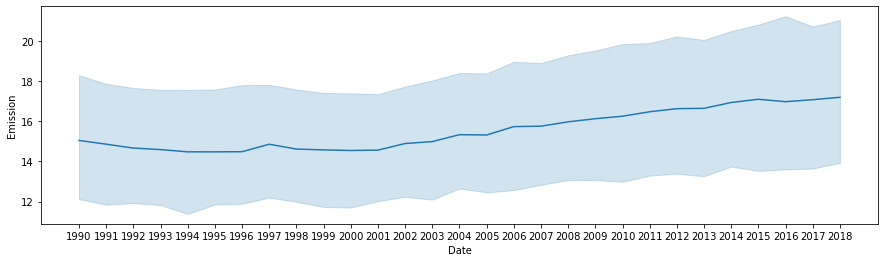

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15, 4
sns.lineplot(x= new_df.Date, y=new_df.Emission)

Going to divide the data into 90s and the 2000s. Looks like there is huge difference in them. 

In [55]:
df_90s = new_df[new_df.Date <= '1999'].reset_index()
df_90s

,index,Country,Sector,Gas,Unit,Date,Emission
0,50401,Zambia,Industrial Processes,CH4,MTCO2e,1990,0.00
1,49235,Senegal,Waste,CH4,MTCO2e,1990,1.65
2,49236,Qatar,Other Fuel Combustion,CH4,MTCO2e,1990,0.62
3,49237,Zambia,Energy,CH4,MTCO2e,1990,2.62
4,49238,Eritrea,Total excluding LUCF,CH4,MTCO2e,1990,2.46
...,...,...,...,...,...,...,...
17375,34183,Trinidad and Tobago,Agriculture,CH4,MTCO2e,1999,0.09
17376,34184,Canada,Industrial Processes,CH4,MTCO2e,1999,0.11
17377,34185,United Kingdom,Industrial Processes,CH4,MTCO2e,1999,0.15
17378,34186,Georgia,Other Fuel Combustion,CH4,MTCO2e,1999,0.08


In [56]:
df_90s.sort_values(by=['Sector','Date'],
               ascending=[True, True]).reset_index()

,level_0,index,Country,Sector,Gas,Unit,Date,Emission
0,7,49241,Namibia,Agriculture,CH4,MTCO2e,1990,4.23
1,11,49245,Kyrgyzstan,Agriculture,CH4,MTCO2e,1990,3.45
2,13,49247,North Korea,Agriculture,CH4,MTCO2e,1990,4.58
3,41,49221,Azerbaijan,Agriculture,CH4,MTCO2e,1990,3.18
4,43,49223,Switzerland,Agriculture,CH4,MTCO2e,1990,4.87
...,...,...,...,...,...,...,...,...
17375,17352,34191,Saint Kitts and Nevis,Waste,CH4,MTCO2e,1999,0.06
17376,17358,34166,Liberia,Waste,CH4,MTCO2e,1999,0.05
17377,17366,34175,Guinea-Bissau,Waste,CH4,MTCO2e,1999,0.06
17378,17369,34178,Suriname,Waste,CH4,MTCO2e,1999,0.07


<AxesSubplot:xlabel='Sector', ylabel='Emission'>

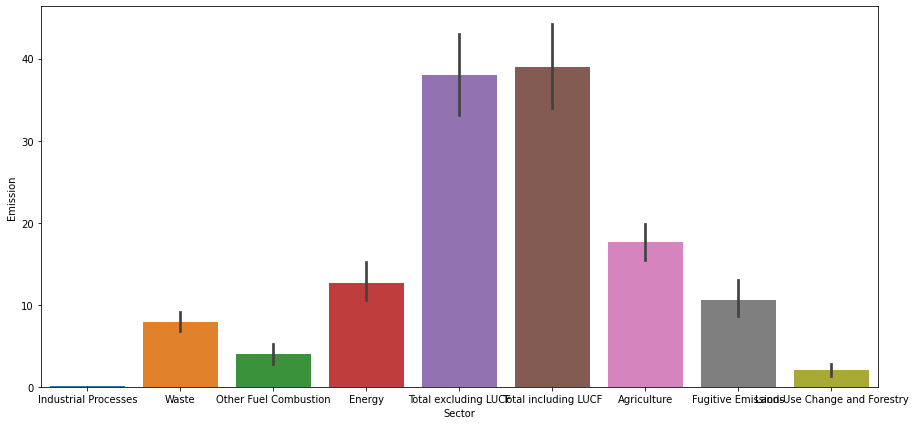

In [57]:

rcParams['figure.figsize'] = 15, 7
sns.barplot(x= df_90s.Sector, y=df_90s.Emission)

In [58]:
new_df_90s = df_90s.set_index(['Country', 'Date', 'Sector'])['Emission'].unstack(["Sector"]).reset_index()
new_df_90s.columns.name= None
#df_90s['Most_emissions'] = df_90s[df_90s.Sector == 'Total excluding LUCF']

new_df_90s.head()

,Country,Date,Agriculture,Energy,Fugitive Emissions,Industrial Processes,Land-Use Change and Forestry,Other Fuel Combustion,Total excluding LUCF,Total including LUCF,Waste
0,Afghanistan,1990,5.36,2.51,0.28,0.0,0.0,2.23,8.97,8.97,1.09
1,Afghanistan,1991,5.61,2.29,0.24,0.0,0.0,2.04,9.07,9.07,1.17
2,Afghanistan,1992,5.67,2.06,0.20,0.0,0.0,1.86,8.99,8.99,1.25
3,Afghanistan,1993,5.72,1.84,0.16,0.0,0.0,1.68,8.89,8.89,1.33
4,Afghanistan,1994,5.93,1.62,0.12,0.0,0.0,1.50,8.96,8.96,1.41


Combining the Sectors that created the most Emissions. 

In [59]:
new_df_90s["Most Emissions Combo"] = new_df_90s["Total including LUCF"] + new_df_90s["Fugitive Emissions"] + new_df_90s["Other Fuel Combustion"]

new_df_90s.head()

,Country,Date,Agriculture,Energy,Fugitive Emissions,Industrial Processes,Land-Use Change and Forestry,Other Fuel Combustion,Total excluding LUCF,Total including LUCF,Waste,Most Emissions Combo
0,Afghanistan,1990,5.36,2.51,0.28,0.0,0.0,2.23,8.97,8.97,1.09,11.48
1,Afghanistan,1991,5.61,2.29,0.24,0.0,0.0,2.04,9.07,9.07,1.17,11.35
2,Afghanistan,1992,5.67,2.06,0.20,0.0,0.0,1.86,8.99,8.99,1.25,11.05
3,Afghanistan,1993,5.72,1.84,0.16,0.0,0.0,1.68,8.89,8.89,1.33,10.73
4,Afghanistan,1994,5.93,1.62,0.12,0.0,0.0,1.50,8.96,8.96,1.41,10.58


In [60]:
emissions_by_year_90s = new_df_90s.groupby('Date')['Most Emissions Combo'].sum().to_frame().reset_index()
emissions_by_year_90s

,Date,Most Emissions Combo
0,1990,10289.21
1,1991,10180.77
2,1992,10017.57
3,1993,9950.79
4,1994,9835.98
5,1995,9829.63
6,1996,9847.79
7,1997,10067.16
8,1998,9921.45
9,1999,9910.60


<AxesSubplot:xlabel='Date', ylabel='Most Emissions Combo'>

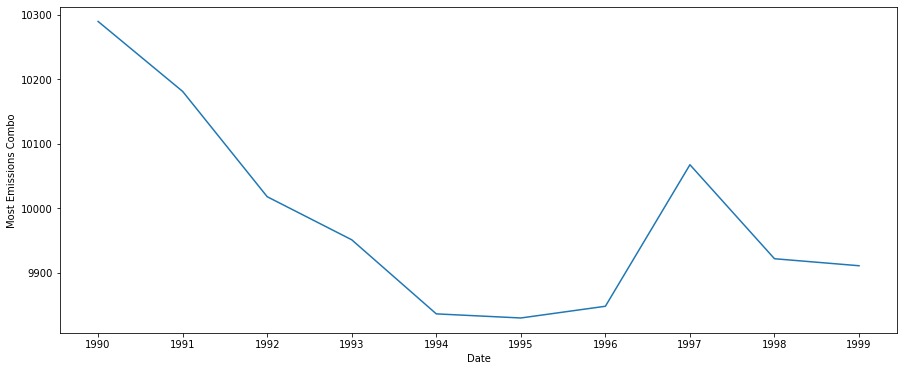

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15, 6
sns.lineplot(x= emissions_by_year_90s.Date, y=emissions_by_year_90s['Most Emissions Combo'])


Looks like the Sectors that populated the most in the 90s saw a downward trend in their emissions. 

In [62]:
df_2000s = new_df[new_df.Date >= '2000'].reset_index()
df_2000s

,index,Country,Sector,Gas,Unit,Date,Emission
0,31865,Kyrgyzstan,Agriculture,CH4,MTCO2e,2000,2.22
1,31864,Serbia,Energy,CH4,MTCO2e,2000,3.17
2,31863,Mozambique,Waste,CH4,MTCO2e,2000,2.19
3,31862,Kuwait,Energy,CH4,MTCO2e,2000,2.60
4,31857,Zambia,Energy,CH4,MTCO2e,2000,1.83
...,...,...,...,...,...,...,...
33017,1163,United Kingdom,Industrial Processes,CH4,MTCO2e,2018,0.08
33018,1164,Georgia,Other Fuel Combustion,CH4,MTCO2e,2018,0.08
33019,1165,Guinea-Bissau,Land-Use Change and Forestry,CH4,MTCO2e,2018,0.08
33020,1154,Israel,Other Fuel Combustion,CH4,MTCO2e,2018,0.09


<AxesSubplot:xlabel='Sector', ylabel='Emission'>

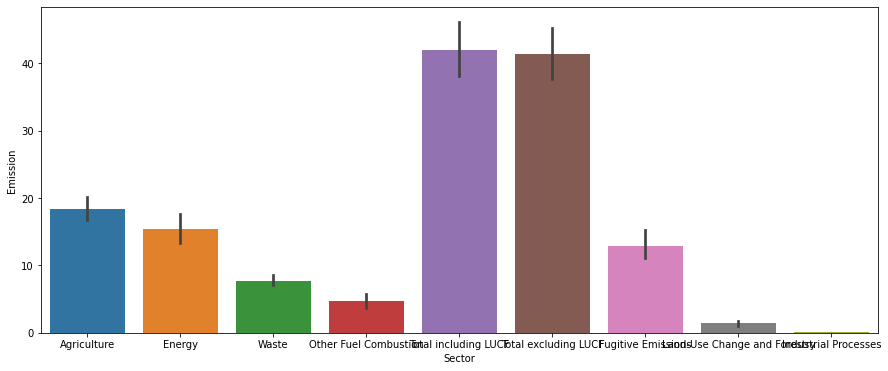

In [63]:
rcParams['figure.figsize'] = 15, 6
sns.barplot(x= df_2000s.Sector, y=df_2000s.Emission)

In [64]:
new_df_2000s = df_2000s.set_index(['Country', 'Date', 'Sector'])['Emission'].unstack(["Sector"]).reset_index()
new_df_2000s.columns.name= None
new_df_2000s

,Country,Date,Agriculture,Energy,Fugitive Emissions,Industrial Processes,Land-Use Change and Forestry,Other Fuel Combustion,Total excluding LUCF,Total including LUCF,Waste
0,Afghanistan,2000,7.71,1.12,0.09,0.00,0.00,1.03,10.59,10.59,1.76
1,Afghanistan,2001,6.42,1.10,0.08,0.00,0.00,1.01,9.36,9.36,1.84
2,Afghanistan,2002,8.19,1.07,0.08,0.00,0.00,1.00,11.19,11.19,1.93
3,Afghanistan,2003,8.43,1.05,0.07,0.00,0.00,0.98,11.48,11.48,2.01
4,Afghanistan,2004,8.34,1.02,0.06,0.00,0.00,0.96,11.46,11.46,2.09
...,...,...,...,...,...,...,...,...,...,...,...
3700,Zimbabwe,2014,5.89,2.22,0.60,0.48,0.08,1.61,10.82,10.90,2.23
3701,Zimbabwe,2015,6.64,2.40,0.66,0.48,0.14,1.74,11.79,11.93,2.27
3702,Zimbabwe,2016,6.14,2.44,0.68,0.48,0.11,1.76,11.38,11.50,2.32
3703,Zimbabwe,2017,6.23,2.48,0.70,0.48,0.06,1.78,11.56,11.62,2.37


In [65]:
new_df_2000s["Most Emissions Combo"] = new_df_2000s["Total including LUCF"] + new_df_2000s["Total excluding LUCF"] + new_df_2000s["Agriculture"] + new_df_2000s["Energy"]

new_df_2000s.head()

,Country,Date,Agriculture,Energy,Fugitive Emissions,Industrial Processes,Land-Use Change and Forestry,Other Fuel Combustion,Total excluding LUCF,Total including LUCF,Waste,Most Emissions Combo
0,Afghanistan,2000,7.71,1.12,0.09,0.0,0.0,1.03,10.59,10.59,1.76,30.01
1,Afghanistan,2001,6.42,1.10,0.08,0.0,0.0,1.01,9.36,9.36,1.84,26.24
2,Afghanistan,2002,8.19,1.07,0.08,0.0,0.0,1.00,11.19,11.19,1.93,31.64
3,Afghanistan,2003,8.43,1.05,0.07,0.0,0.0,0.98,11.48,11.48,2.01,32.44
4,Afghanistan,2004,8.34,1.02,0.06,0.0,0.0,0.96,11.46,11.46,2.09,32.28


In [66]:
emissions_by_year_2000s = new_df_2000s.groupby('Date')['Most Emissions Combo'].sum().to_frame().reset_index()
emissions_by_year_2000s

,Date,Most Emissions Combo
0,2000,20706.89
1,2001,20803.53
2,2002,21084.49
3,2003,21280.44
4,2004,21661.19
5,2005,21753.25
6,2006,22206.63
7,2007,22406.76
8,2008,22715.98
9,2009,22796.10


<AxesSubplot:xlabel='Date', ylabel='Most Emissions Combo'>

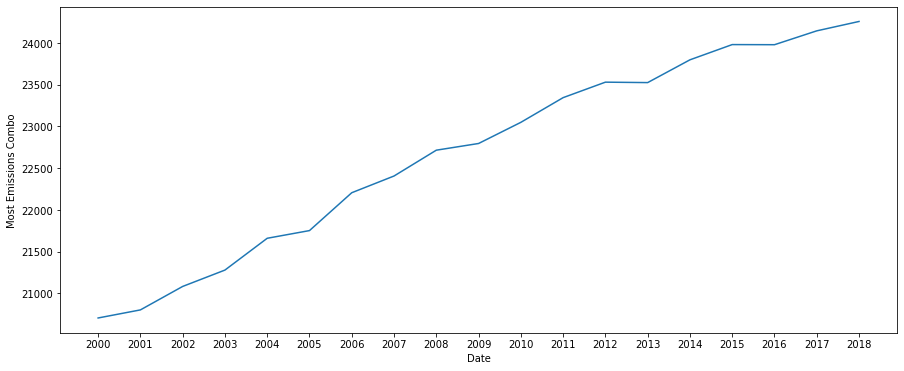

In [67]:
sns.lineplot(x=emissions_by_year_2000s.Date, y=emissions_by_year_2000s['Most Emissions Combo'])

Find the most polluting countries. 

In [68]:
most_polluting_countries = new_df_2000s.groupby('Country')['Most Emissions Combo'].sum().to_frame().reset_index()
most_polluting_countries

,Country,Most Emissions Combo
0,Afghanistan,2072.41
1,Albania,174.23
2,Algeria,2478.07
3,Andorra,1.72
4,Angola,1990.44
...,...,...
190,Vietnam,4343.21
191,World,0.00
192,Yemen,389.05
193,Zambia,983.92


In [71]:
import os
import plotly.express as px
import plotly.graph_objs as go
px.bar(
    data_frame=most_polluting_countries.sort_values(by='Most Emissions Combo', ascending = False)[:10].reset_index(),
    x = 'Most Emissions Combo',
    y='Country',
    color ='Country',
    orientation='h',
    title='10 Most Polluting Countries in the 2000s',
    template={
        "layout": go.Layout(
            title_x = 0.5,
            xaxis={
                "showgrid":True,
                "gridwidth":2,
                "ticks":"inside",
            },
            yaxis= {
                "showticklabels": True,
                "type": 'category',
                'dtick': 1
            }
        )
    }
    
)

5. Rankings per Sector
What are the rankings based on each sector? are they all consistent throughout all sectors? Let's find out.

In [ ]:
new_df.head()

,Country,Sector,Gas,Unit,Date,Emission
50401,Zambia,Industrial Processes,CH4,MTCO2e,1990,0.00
49235,Senegal,Waste,CH4,MTCO2e,1990,1.65
49236,Qatar,Other Fuel Combustion,CH4,MTCO2e,1990,0.62
49237,Zambia,Energy,CH4,MTCO2e,1990,2.62
49238,Eritrea,Total excluding LUCF,CH4,MTCO2e,1990,2.46


In [ ]:
import warnings
data_2018 = new_df.query('Date=="2018"').reset_index()
data_2018.rename(columns={"Emission": "Total emissions"}, inplace=True)

<AxesSubplot:xlabel='Sector', ylabel='Total emissions'>

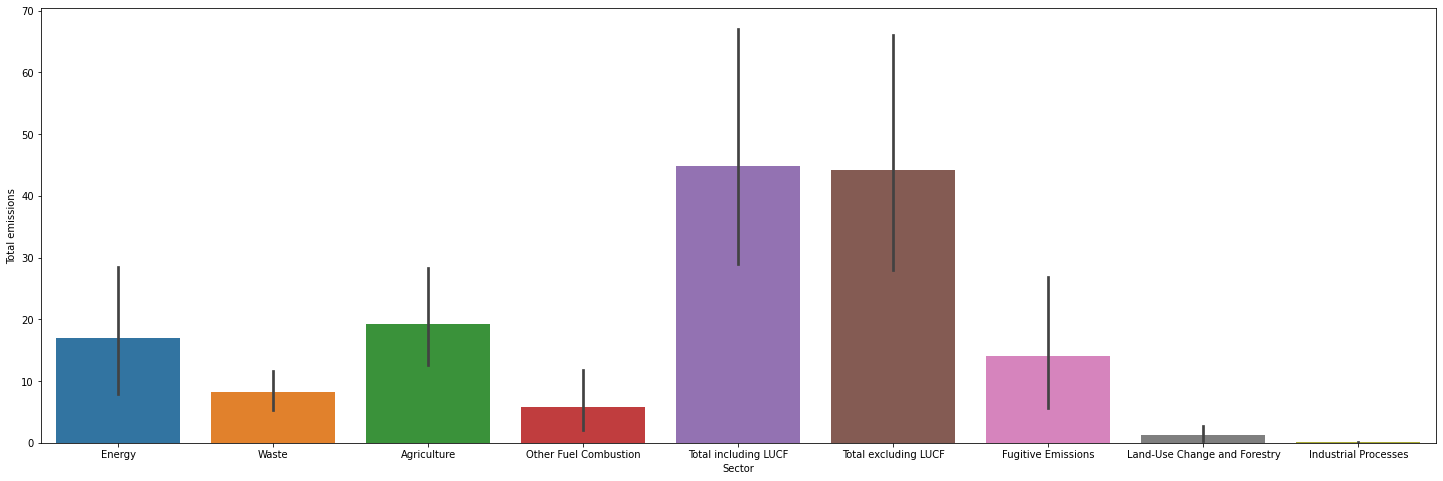

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(data=data_2018, x= 'Sector', y = 'Total emissions')